In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# 1. 定义目标函数 y = sin(x) + 0.2 * x
def target_function(x):
    return np.sin(x) + 0.2 * x

In [111]:
# 2. 生成训练集和测试集
def generate_data(start=-5, end=5, num_samples=500):
    x = np.linspace(start, end, num_samples)
    y = target_function(x)
    return x, y

In [112]:
# 3. 定义两层ReLU神经网络
class TwoLayerNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        # 初始化权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1  # 输入层到隐藏层的权重
        self.b1 = np.zeros(hidden_size)  # 隐藏层的偏置
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1  # 隐藏层到输出层的权重
        self.b2 = np.zeros(output_size)  # 输出层的偏置
        self.learning_rate = learning_rate  # 学习率

    def relu(self, x):
        return np.maximum(0, x)  # ReLU激活函数

    def forward(self, x):
        # 前向传播
        self.z1 = np.dot(x, self.W1) + self.b1  # 隐藏层输入
        self.a1 = self.relu(self.z1)  # 隐藏层输出
        self.z2 = np.dot(self.a1, self.W2) + self.b2  # 输出层输入
        return self.z2  # 输出层输出 (没有激活函数)

    def backward(self, x, y, output):
        # 反向传播计算梯度
        output_error = output - y  # 输出误差
        dW2 = np.dot(self.a1.T, output_error)  # 输出层权重梯度
        db2 = np.sum(output_error, axis=0)  # 输出层偏置梯度
        hidden_error = np.dot(output_error, self.W2.T) * (self.a1 > 0)  # 隐藏层误差（ReLU导数）
        dW1 = np.dot(x.T, hidden_error)  # 隐藏层权重梯度
        db1 = np.sum(hidden_error, axis=0)  # 隐藏层偏置梯度
        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2):
        # 使用梯度更新参数
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, x_train, y_train, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(x_train)
            dW1, db1, dW2, db2 = self.backward(x_train, y_train, output)
            self.update_params(dW1, db1, dW2, db2)

            if epoch % 100 == 0:
                loss = np.mean((output - y_train) ** 2)  # 均方误差损失
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


In [113]:
# 4. 训练模型
x_train, y_train = generate_data(-5, 5, 100)  # 生成训练数据
x_train = x_train.reshape(-1, 1)  # 转换为列向量
y_train = y_train.reshape(-1, 1)  # 转换为列向量

# 初始化神经网络，输入维度=1，隐藏层神经元=20，输出维度=1
model = TwoLayerNN(input_size=1, hidden_size=20, output_size=1)

# 训练模型
model.train(x_train, y_train, epochs=20000)

Epoch 0, Loss: 0.6922
Epoch 100, Loss: 0.4113
Epoch 200, Loss: 0.2750
Epoch 300, Loss: 0.0746
Epoch 400, Loss: 0.0190
Epoch 500, Loss: 0.0126
Epoch 600, Loss: 0.0114
Epoch 700, Loss: 0.0111
Epoch 800, Loss: 0.0110
Epoch 900, Loss: 0.0109
Epoch 1000, Loss: 0.0109
Epoch 1100, Loss: 0.0109
Epoch 1200, Loss: 0.0108
Epoch 1300, Loss: 0.0108
Epoch 1400, Loss: 0.0108
Epoch 1500, Loss: 0.0108
Epoch 1600, Loss: 0.0108
Epoch 1700, Loss: 0.0108
Epoch 1800, Loss: 0.0108
Epoch 1900, Loss: 0.0108
Epoch 2000, Loss: 0.0108
Epoch 2100, Loss: 0.0108
Epoch 2200, Loss: 0.0107
Epoch 2300, Loss: 0.0107
Epoch 2400, Loss: 0.0107
Epoch 2500, Loss: 0.0107
Epoch 2600, Loss: 0.0107
Epoch 2700, Loss: 0.0107
Epoch 2800, Loss: 0.0107
Epoch 2900, Loss: 0.0107
Epoch 3000, Loss: 0.0106
Epoch 3100, Loss: 0.0106
Epoch 3200, Loss: 0.0106
Epoch 3300, Loss: 0.0106
Epoch 3400, Loss: 0.0106
Epoch 3500, Loss: 0.0106
Epoch 3600, Loss: 0.0106
Epoch 3700, Loss: 0.0106
Epoch 3800, Loss: 0.0107
Epoch 3900, Loss: 0.0122
Epoch 4000, 

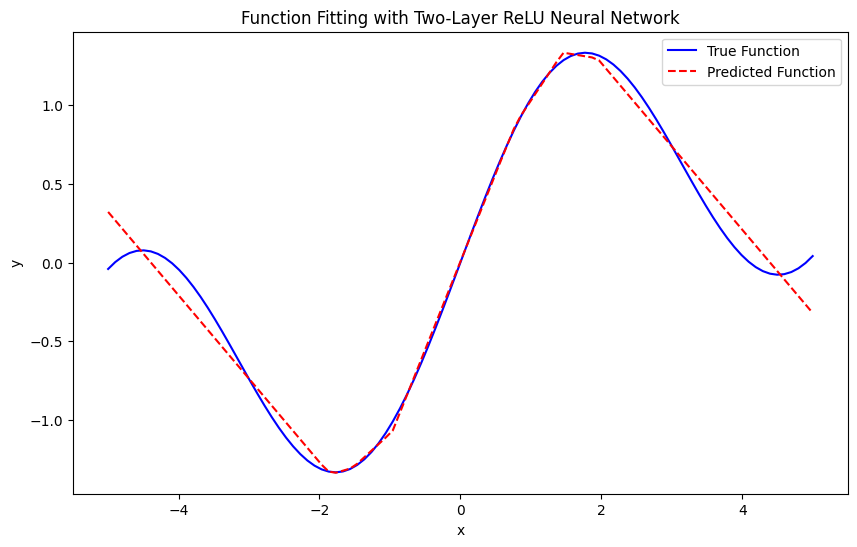

In [114]:
# 5. 测试和可视化
x_test, y_test = generate_data(-5, 5, 100)  # 生成测试数据
x_test = x_test.reshape(-1, 1)  # 转换为列向量
y_test = y_test.reshape(-1, 1)  # 转换为列向量

# 使用训练好的模型进行预测
y_pred = model.forward(x_test)

# 绘制拟合效果图
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True Function', color='blue')
plt.plot(x_test, y_pred, label='Predicted Function', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Function Fitting with Two-Layer ReLU Neural Network')
plt.show()